In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/depot/tdm-musafe/apps')
from make_features import load_data
incidents, acceleration = load_data()

These seven employers had some very fast confirmation times.

In [2]:
incidents['delay'] = incidents['confirmation_ts'] - incidents['occurrence_ts']
incidents['delay_s'] = incidents['delay']/pd.Timedelta('1s')
fast_employers = set(incidents[incidents.delay < '30s']['hash_id'])
fast_employers

{'0c96025713b01a04beff5193cbf7d76d',
 '1bd47bc54ee0cf5ec88079d6a346d817',
 '39bf04098a77bb913f9bc5d641d0f9f9',
 '515e8ea766512d541bd64f50668952ae',
 '8ab702b0237a1f68aa821b8d4f8dc2ef',
 'e81ad8a2e87bd88e4ff71d8da2c7a026',
 'f3af00480024c8e968798ab4524c3eb1'}

Here is when they did those confirmations.

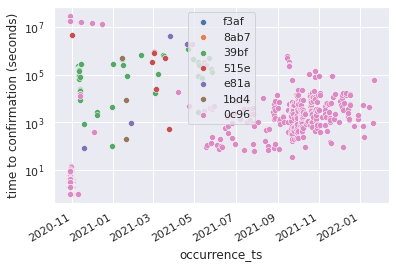

In [3]:
sns.set()
fig, ax = plt.subplots()
for employer in fast_employers:
    sns.scatterplot(data = incidents[incidents['hash_id'] == employer], x='occurrence_ts', y='delay_s', label=employer[:4])
ax.set_yscale('log')
ax.set_ylabel('time to confirmation (seconds)')
fig.autofmt_xdate()
plt.savefig('time to confirmation versus occurrence_ts.png')
plt.show()

Let's have a closer look.

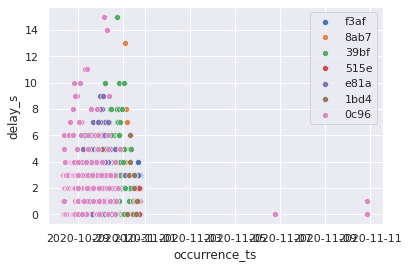

In [4]:
fig, ax = plt.subplots()
for employer in fast_employers:
    sns.scatterplot(x='occurrence_ts', y='delay_s', label=employer[:4], data = incidents[(incidents['hash_id'] == employer) & (incidents['delay_s'] < 16)])
plt.show()

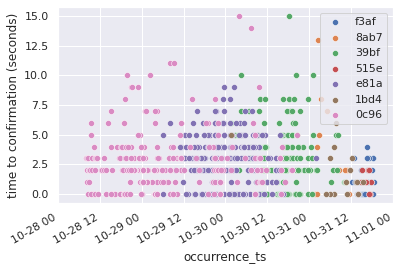

In [5]:
fig, ax = plt.subplots()
for employer in fast_employers:
    sns.scatterplot(x='occurrence_ts', y='delay_s', label=employer[:4], data = incidents[(incidents['hash_id'] == employer) & (incidents['delay_s'] < 16)])
ax.set_xlim(pd.to_datetime('october 28 2020'), pd.to_datetime('november 1 2020'))
ax.set_ylabel('time to confirmation (seconds)')
fig.autofmt_xdate()
plt.savefig('time to confirmation versus occurrence_ts zoomed in.png')
plt.show()

For context, here is when all the employers had their incidents, versus their confirmations. Notice that several employers handled the labeling in batches.

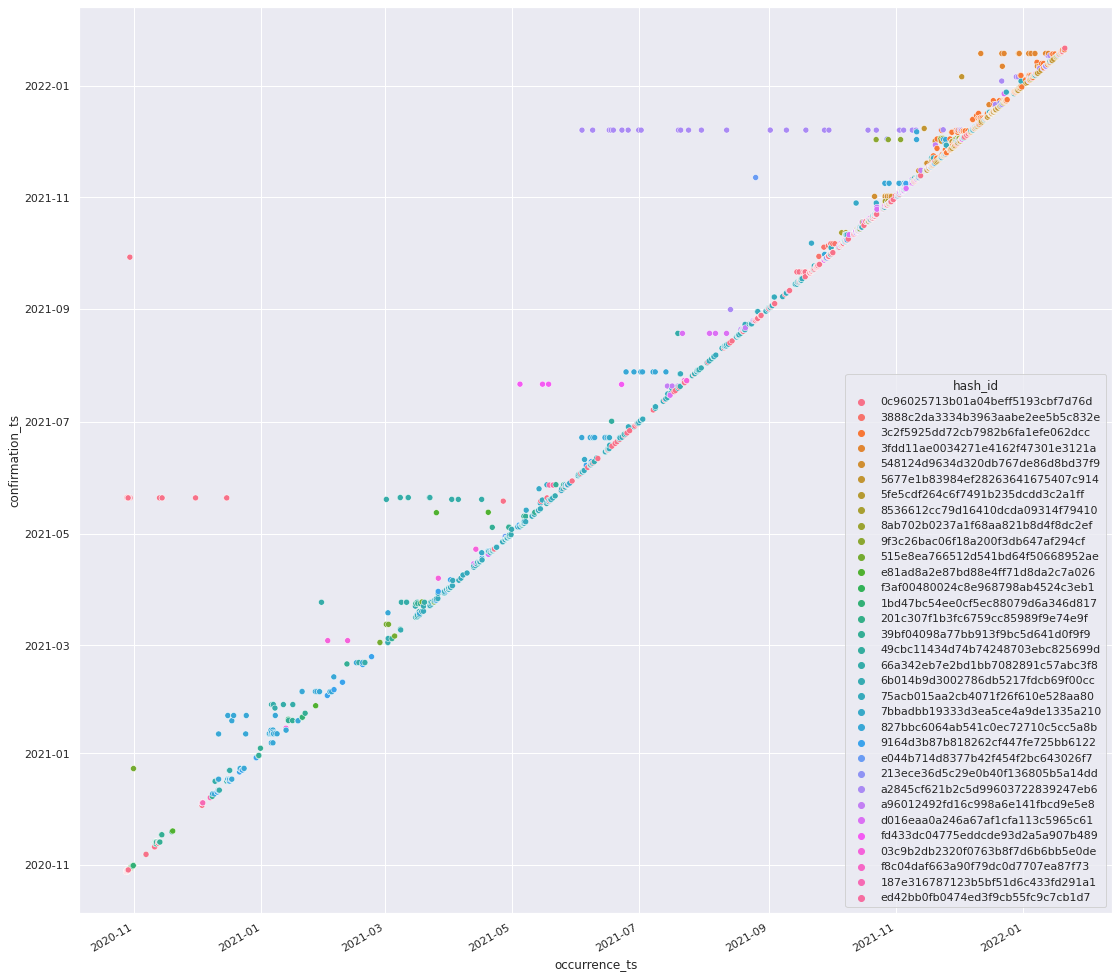

In [6]:
fig, ax = plt.subplots()
sns.scatterplot(data = incidents, x='occurrence_ts', y='confirmation_ts', hue='hash_id')
fig.set_size_inches(18.5, 18.5)

fig.autofmt_xdate()
plt.savefig('occurrece_ts versus confirmation_ts.png')
plt.show()

Those batches explain the curves which appear in the logarithmic plot below.

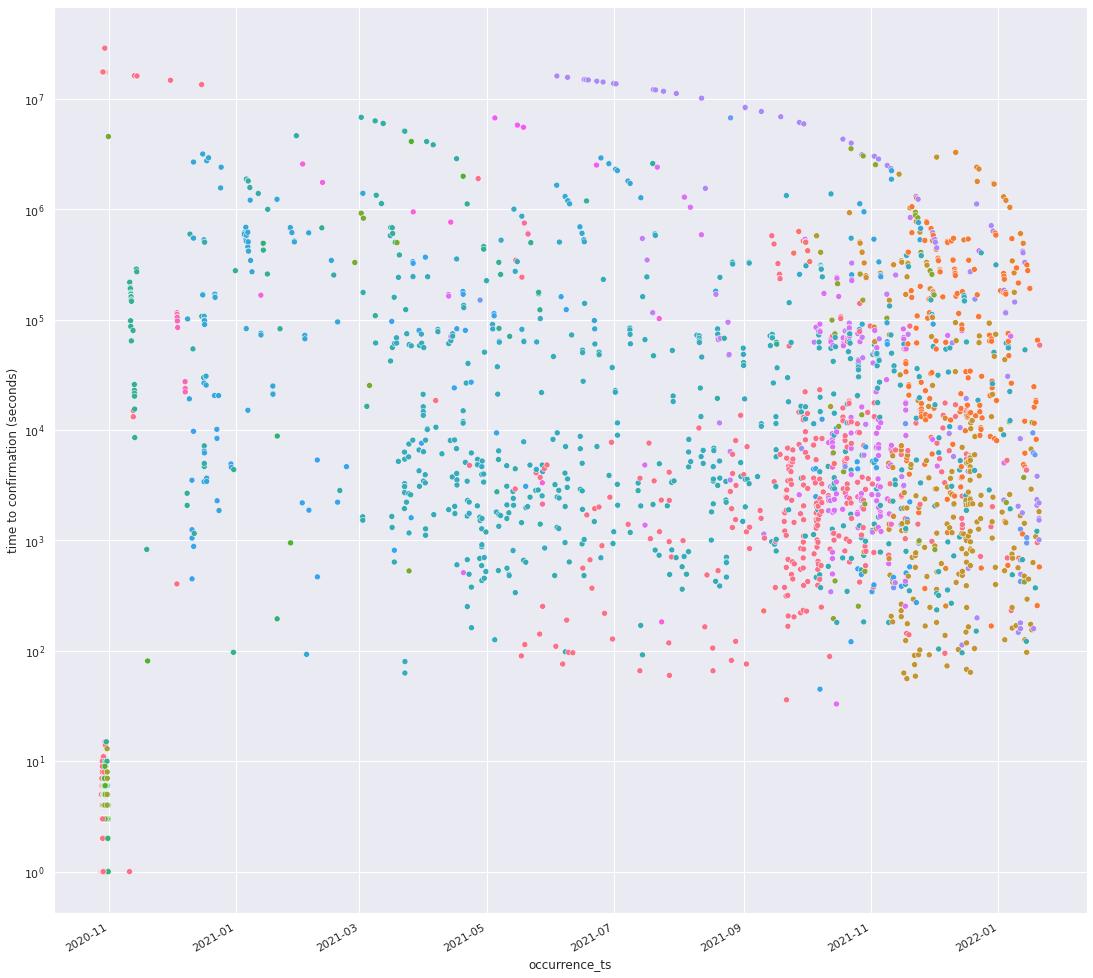

In [7]:
sns.set()
fig, ax = plt.subplots()
sns.scatterplot(data = incidents, x='occurrence_ts', y='delay_s', hue='hash_id')
ax.set_yscale('log')
ax.set_ylabel('time to confirmation (seconds)')
ax.get_legend().remove()


fig.set_size_inches(18.5, 18.5)

fig.autofmt_xdate()
plt.savefig('time to confirmation versus occurrence_ts logarithmic all data.png')
plt.show()